# Bernstein-Vazirani Algorithm

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Enter Secret number1010


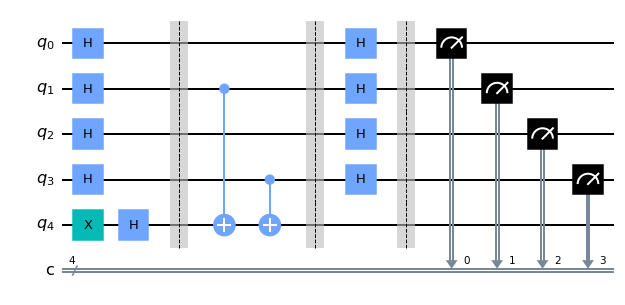

In [3]:
import qiskit
from qiskit import *
from qiskit.tools.visualization import plot_histogram
secretnumber = input("Enter Secret number")
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()
for ii,yesno in enumerate(reversed(secretnumber)):
    if yesno == "1":
        circuit.cx(ii,len(secretnumber))
circuit.barrier()
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))
circuit.draw()

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= simulator, shots=1).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)